In [51]:
# Problem Set 3: Simulating the Spread of Disease and Virus Population Dynamics 

import random
import pylab
from numpy import mean

#random.seed(0)

''' 
Begin helper code
'''

class NoChildException(Exception):
    """
    NoChildException is raised by the reproduce() method in the SimpleVirus
    and ResistantVirus classes to indicate that a virus particle does not
    reproduce. You can use NoChildException as is, you do not need to
    modify/add any code.
    """

'''
End helper code
'''

#
# PROBLEM 1
#
class SimpleVirus(object):
    """
    Representation of a simple virus (does not model drug effects/resistance).
    """
    def __init__(self, maxBirthProb, clearProb):
        """
        Initialize a SimpleVirus instance, saves all parameters as attributes
        of the instance.        
        maxBirthProb: Maximum reproduction probability (a float between 0-1)        
        clearProb: Maximum clearance probability (a float between 0-1).
        """
        self.maxBirthProb = maxBirthProb
        self.clearProb = clearProb

    def getMaxBirthProb(self):
        """
        Returns the max birth probability.
        """
        return self.maxBirthProb

    def getClearProb(self):
        """
        Returns the clear probability.
        """
        return self.clearProb

    def doesClear(self):
        """ Stochastically determines whether this virus particle is cleared from the
        patient's body at a time step. 
        returns: True with probability self.getClearProb and otherwise returns
        False.
        """
        if self.getClearProb() >= random.random():
            return True
        else:
            return False
        
    
    def reproduce(self, popDensity):
        """
        Stochastically determines whether this virus particle reproduces at a
        time step. Called by the update() method in the Patient and
        TreatedPatient classes. The virus particle reproduces with probability
        self.maxBirthProb * (1 - popDensity).
        
        If this virus particle reproduces, then reproduce() creates and returns
        the instance of the offspring SimpleVirus (which has the same
        maxBirthProb and clearProb values as its parent).         

        popDensity: the population density (a float), defined as the current
        virus population divided by the maximum population.         
        
        returns: a new instance of the SimpleVirus class representing the
        offspring of this virus particle. The child should have the same
        maxBirthProb and clearProb values as this virus. Raises a
        NoChildException if this virus particle does not reproduce.               
        """        
        if (self.getMaxBirthProb() * (1 - popDensity)) >= random.random():
            return SimpleVirus(self.getMaxBirthProb(), self.getClearProb())
        else:
            raise NoChildException


class Patient(object):
    """
    Representation of a simplified patient. The patient does not take any drugs
    and his/her virus populations have no drug resistance.
    """    

    def __init__(self, viruses, maxPop):
        """
        Initialization function, saves the viruses and maxPop parameters as
        attributes.

        viruses: the list representing the virus population (a list of
        SimpleVirus instances)

        maxPop: the maximum virus population for this patient (an integer)
        """
        self.viruses = viruses
        self.maxPop = maxPop


    def getViruses(self):
        """
        Returns the viruses in this Patient.
        """
        return self.viruses


    def getMaxPop(self):
        """
        Returns the max population.
        """
        return self.maxPop


    def getTotalPop(self):
        """
        Gets the size of the current total virus population. 
        returns: The total virus population (an integer)
        """
        return len(self.viruses)


    def update(self):
        """
        Update the state of the virus population in this patient for a single
        time step. update() should execute the following steps in this order:
        
        - Determine whether each virus particle survives and updates the list
        of virus particles accordingly.   
        
        - The current population density is calculated. This population density
          value is used until the next call to update() 
        
        - Based on this value of population density, determine whether each 
          virus particle should reproduce and add offspring virus particles to 
          the list of viruses in this patient.                    

        returns: The total virus population at the end of the update (an
        integer)
        """
       
        surviving_viruses = []
        for virus in self.getViruses():
            if not virus.doesClear():
                surviving_viruses.append(virus)
                
        # print('printing surviving viruses list in .update():', surviving_viruses)
        self.viruses = surviving_viruses
        popDensity = self.getTotalPop() / self.getMaxPop()
        # print('printint getTotalPop', self.getTotalPop())
        # print('printint getTotalPop', self.getMaxPop())
        # print('printing popDensity:', popDensity)
        virus_offspring = []
        
        for virus in self.getViruses():
            try:
                virus_offspring.append((virus.reproduce(popDensity)))
            except NoChildException:
                continue
                
        self.viruses += virus_offspring
        
        return self.getTotalPop()

#
# PROBLEM 2
#
def simulationWithoutDrug(numViruses, maxPop, maxBirthProb, clearProb,
                          numTrials):
    """
    Run the simulation and plot the graph for problem 3 (no drugs are used,
    viruses do not have any drug resistance).    
    For each of numTrials trial, instantiates a patient, runs a simulation
    for 300 timesteps, and plots the average virus population size as a
    function of time.

    numViruses: number of SimpleVirus to create for patient (an integer)
    maxPop: maximum virus population for patient (an integer)
    maxBirthProb: Maximum reproduction probability (a float between 0-1)        
    clearProb: Maximum clearance probability (a float between 0-1)
    numTrials: number of simulation runs to execute (an integer)
    """
     #Ensuring numTrials stays under 100 (as directed in problem outline)
    if numTrials > 100:
        raise Exception('numTrials must be less than 100')
        
    #creating initial viruses
    virus_list = []
    for i in range(numViruses):
        virus_list.append(SimpleVirus(maxBirthProb, clearProb))   
    
    #creating patient list
    patient_list = []
    for patient in range(numTrials):
        patient_list.append(Patient(virus_list, maxPop))
    
    #creating x and y values to be plotted
    timesteps = range(300)     # x-values
    avg_pop_per_timestep = []  # y-values
    
    #creating list of avg population size per timestep
    for timestep in timesteps:
        virus_pops_per_timestep = []
        for patient in patient_list:
            patient.update()
            virus_pops_per_timestep.append(patient.getTotalPop())
        avg_pop_per_timestep.append(mean(virus_pops_per_timestep))
    
    # print(avg_pop_per_timestep)
    # pylab.plot(timesteps, avg_pop_per_timestep)
    pylab.plot(avg_pop_per_timestep, label = "SimpleVirus")
    pylab.title("SimpleVirus simulation")
    pylab.xlabel("Time Steps")
    pylab.ylabel("Average Virus Population")
    pylab.legend(loc = "best")
    pylab.show()
    

#simulationWithoutDrug(100, 1000, abs(random.random()-0.5), random.random(), 100)

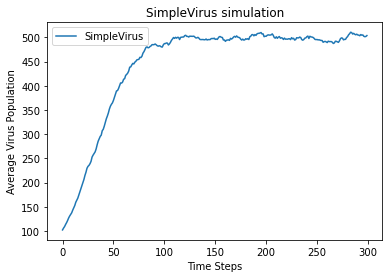

In [52]:
simulationWithoutDrug(100, 1000, 0.1, 0.05, 10)